In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Bangalore Data.csv", encoding='ISO-8859-1')

<ipython-input-153-b99c88ebefe6>:1: DtypeWarning: Columns (0,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("/content/drive/MyDrive/Bangalore Data.csv", encoding='ISO-8859-1')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PGName     1204 non-null   object 
 1   Ratings    1204 non-null   float64
 2   resultbox  1160 non-null   object 
 3   locality   1203 non-null   object 
 4   review     660 non-null    object 
 5   City       1205 non-null   object 
dtypes: float64(1), object(5)
memory usage: 48.0+ MB


In [ ]:
import pandas as pd
import numpy as np
import nltk


In [ ]:
dataset

,PGName,Ratings,resultbox,locality,review,City
0,Chegus Perennial Pg For Men and Women,4.5,1 Ratings,K R Road Basavanagudi,NaN,Bangalore
1,Bhagyalakshmi Paying Guest,3.8,10 Ratings,2nd Block Banashankari 1st Stage,NaN,Bangalore
2,Shree Nilaya Paying Guest For Men,4.0,1 Ratings,Shivaganga Mutt Road Chamarajpet,NaN,Bangalore
3,Siddarth Associates,3.8,123 Ratings,J.C. Road Jc Road,The room is very nice and cozy. Important plac...,Bangalore
4,Sri Lakshmi Pg For Gents,3.7,28 Ratings,Pipeline Road Malleswaram,NaN,Bangalore
...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset=dataset[['PGName','Ratings','locality','review','City']]

In [ ]:
dataset.isnull().sum()

PGName      1047371
Ratings     1047371
locality    1047372
review      1047915
City        1047370
dtype: int64

In [ ]:
dataset=dataset.dropna()

In [ ]:
dataset.duplicated().sum()

108

In [ ]:
dataset=dataset[dataset['Ratings']>3]


In [ ]:
dataset

,PGName,Ratings,locality,review,City
3,Siddarth Associates,3.8,J.C. Road Jc Road,The room is very nice and cozy. Important plac...,Bangalore
6,Shree Krishna Gujarati Pg,3.7,Banashakri Jayanagar 4th Block,Pg feels homely. Veg food and getting food on ...,Bangalore
7,Green Homes Pg,3.3,6th C Main Jayanagar 4th Block,I absolutely enjoyed my interactions with the ...,Bangalore
9,Atithi Stayings Gents,4.6,Cross Road Corporation Circle,Good pg good condition everything is fine,Bangalore
10,SHIRIDI SAI GENTS PG,4.4,13th Cross Jayanagar 5th Block,"Best host, had a really good experience..",Bangalore
...,...,...,...,...,...
1199,Katra Pg House,4.8,Maharaja Agrasen Marg Govindpuri,Best pg in Govindpuri.,Delhi
1200,Roost Coliving,4.8,Orchid Island Gate No-2,This pg is worth more than 5 stars. It truly s...,Delhi
1201,Supreme Paying Guest Accomodation,4.4,18 Meter Road Sector 26,Pg is good in fooding and lodging.,Delhi
1202,Book My Bed,3.6,E-80 South Extension 1,Very good option for pg accommodation in south...,Delhi


In [ ]:
#dataset['PGdata']=dataset['PGName']+dataset['locality']
#dataset['PGdata']=dataset['PGName']+dataset['locality']

In [ ]:
reviews_list = list(dataset['review'])

In [ ]:
import nltk
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
# vader builds upon widely-known text analysis libraries(it generate sentiment score)
#The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language
#processing (NLP) for English written in the Python programming language.

In [ ]:
nltk.download('vader_lexicon') # fir SentimentIntensityAnalyzer
nltk.download('punkt') # fir tokenize

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sid = SentimentIntensityAnalyzer()


In [ ]:
review_tok = tokenize.sent_tokenize(reviews_list[0])
review_tok



['The room is very nice and cozy.',
 'Important places like bus stop and hotels are easily accessible.',
 'I liked it.']

In [ ]:
#The Compound score is a metric that calculates the sum of all the lexicon ratings
#which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

#positive sentiment : (compound score >= 0.05)
#neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
#negative sentiment : (compound score <= -0.05)

In [ ]:
for sentence in review_tok:
    print('Sentence text:')
    print(sentence)
    sentence_polarity_scores = sid.polarity_scores(sentence)

    for key in sorted(sentence_polarity_scores.keys()):
        print('{}: {}, '.format(key,sentence_polarity_scores[key]), end='')
    print('\n')


Sentence text:
The room is very nice and cozy.
compound: 0.4754, neg: 0.0, neu: 0.66, pos: 0.34, 

Sentence text:
Important places like bus stop and hotels are easily accessible.
compound: 0.5423, neg: 0.148, neu: 0.403, pos: 0.45, 

Sentence text:
I liked it.
compound: 0.4215, neg: 0.0, neu: 0.263, pos: 0.737, 



In [ ]:

# Augment the dataset with the overall polarity score of the review,
# as obtained using VADER on the review level.
# polarity shows that the word is positive or negative(LIWC category)
reviews_polarity = []

for i, review in enumerate(reviews_list):
  review_polarity_scores = sid.polarity_scores(review)
  review_polarity_scores_compound = review_polarity_scores['compound']
  '''Uncomment this to print the sentiment score of every review in the dataset.

  print('Review text:')
  print(review)
  print('Review #{:d}: '.format(i_review), end='')
  for key in sorted(review_polarity_scores.keys()):
      print('{}: {:.4f}, '.format(key,review_polarity_scores[key]), end='')
      print('')  '''

  reviews_polarity.append(review_polarity_scores_compound)

In [ ]:
dataset['compound_score'] = reviews_polarity
dataset.head()

,PGName,Ratings,locality,review,City,compound_score
3,Siddarth Associates,3.8,J.C. Road Jc Road,The room is very nice and cozy. Important plac...,Bangalore,0.8553
6,Shree Krishna Gujarati Pg,3.7,Banashakri Jayanagar 4th Block,Pg feels homely. Veg food and getting food on ...,Bangalore,0.4019
7,Green Homes Pg,3.3,6th C Main Jayanagar 4th Block,I absolutely enjoyed my interactions with the ...,Bangalore,0.9150
9,Atithi Stayings Gents,4.6,Cross Road Corporation Circle,Good pg good condition everything is fine,Bangalore,0.7650
10,SHIRIDI SAI GENTS PG,4.4,13th Cross Jayanagar 5th Block,"Best host, had a really good experience..",Bangalore,0.8122


In [ ]:
dataset.describe()

,Ratings,compound_score
count,654.000000,654.000000
mean,4.201142,0.725910
std,0.431563,0.240411
min,3.100000,-0.526700
25%,3.900000,0.624900
50%,4.200000,0.806200
75%,4.518214,0.888450
max,5.000000,0.983200


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 3 to 1203
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PGName          654 non-null    object 
 1   Ratings         654 non-null    float64
 2   locality        654 non-null    object 
 3   review          654 non-null    object 
 4   City            654 non-null    object 
 5   compound_score  654 non-null    float64
dtypes: float64(2), object(4)
memory usage: 35.8+ KB


In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'No. of reviews')

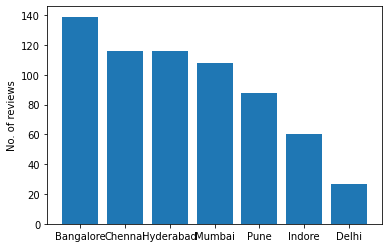

In [ ]:
plt.bar(dataset['City'].unique(), dataset['City'].value_counts() )
plt.ylabel('No. of reviews')



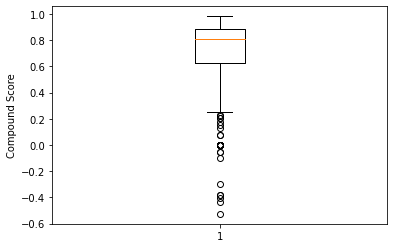

In [ ]:
plt.boxplot(dataset['compound_score'])
plt.ylabel('Compound Score')
plt.show()


In [ ]:

dataset.to_csv('PG_reviews.csv', index=False)

In [ ]:
dataset=pd.read_csv("/content/PG_reviews.csv", encoding='ISO-8859-1')


In [ ]:
dataset=dataset[dataset['compound_score']>0.9]


In [ ]:
dataset=dataset[['PGName','Ratings','locality','City']]


In [ ]:
dataset.reset_index(inplace=True)
data_dict =dataset.to_dict('Records')
data_dict

In [ ]:
data_dict

In [ ]:
dataset.to_csv('PG-data.csv', index=False)


In [ ]:
dataset_Bangalore= dataset[dataset['City']=='Bangalore']

In [ ]:
dataset_Bangalore.shape

(33, 5)

In [ ]:
dataset_Bangalore

In [ ]:
dataset_Chennai= dataset[dataset['City']=='Chennai']

In [ ]:
dataset_Chennai.shape

(11, 5)

In [ ]:
dataset_Chennai

In [ ]:
dataset_Hyderabad= dataset[dataset['City']=='Hyderabad']

In [ ]:
dataset_Hyderabad.shape

(21, 5)

In [ ]:
dataset_Hyderabad

In [ ]:
dataset_Mumbai= dataset[dataset['City']=='Mumbai']

In [ ]:
dataset_Mumbai.shape

(36, 5)

In [ ]:
dataset_Mumbai

In [ ]:
dataset_Pune= dataset[dataset['City']=='Pune']

In [ ]:
dataset_Pune.shape

(20, 5)

In [ ]:
dataset_Indore= dataset[dataset['City']=='Indore']

In [ ]:
dataset_Indore.shape

(5, 5)

In [ ]:
dataset_Indore

In [ ]:
dataset_Delhi= dataset[dataset['City']=='Delhi']

In [ ]:
dataset_Delhi.shape

(25, 5)

In [ ]:
dataset_Delhi

In [ ]:
#from pymongo import MongoClient

In [ ]:
#client = MongoClient('localhost' , 27017)
#db =client.PG_database
#collection = db.PG_database

In [ ]:
#dataset.reset_index(inplace=True)
#data_dict =dataset.to_dict('Records')
#data_dict

In [ ]:
#collection.insert_many(data_dict)

In [ ]:
#!mongodump --db PG_database --out c:/data

In [ ]:
#!mongorestore --db PG_database2 --out c:/data/PG_database
